### Exploring the Advertising Dataset with Linear Regression

Here we will test our implimentation of linear regression against sklearn and explore the Advertising dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# We will use sklearn for linear regression
import sklearn
from sklearn.linear_model import LinearRegression

# This is our beautiful implimentation :D 
import LinearRegression
%matplotlib inline

Let's remind ourselves what we are working with

In [2]:
data = pd.read_csv('Advertising.csv')
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


This data compares advertising spending (in thousands) in various media to sales. Let's investigate

In [3]:
tv = np.array(data['TV']).reshape(-1, 1)
radio = np.array(data['Radio']).reshape(-1, 1)
newspaper = np.array(data['Newspaper']).reshape(-1, 1)
sales = data['Sales']

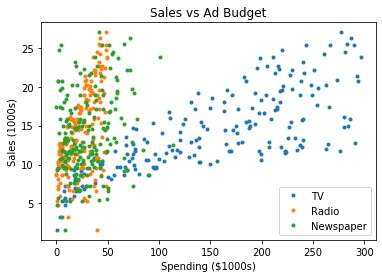

In [4]:
plt.plot(tv, sales, '.')
plt.plot(radio, sales, '.')
plt.plot(newspaper, sales, '.')

plt.legend(('TV', 'Radio', 'Newspaper'))
plt.xlabel("Spending ($1000s)")
plt.ylabel("Sales (1000s)")
plt.title("Sales vs Ad Budget")
plt.show()

From inspection of this simple graph, it appears that TV spending is approximately linear with a slopt of about 0.05, radio may be linear with a slope of ~0.1 to 0.2, and newsapaper may be linear with a slope of 0.05 to 0.1. 

In [5]:
y = data['Sales']
X = np.hstack((np.ones((len(y), 1)), data[['TV', 'Radio', 'Newspaper']].values))

In [6]:
LR = sklearn.linear_model.LinearRegression()
tv_coef = LR.fit(tv, y).coef_[0]
tv_intercept = LR.intercept_
radio_coef = LR.fit(radio, y).coef_[0]
radio_intercept = LR.intercept_
newspaper_coef = LR.fit(newspaper, y).coef_[0]
newspaper_intercept = LR.intercept_

total_coef = LR.fit(tv+radio+newspaper, y).coef_[0]
total_intercept = LR.intercept_

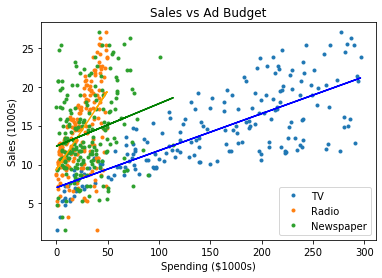

In [7]:
plt.plot(tv, sales, '.')
plt.plot(radio, sales, '.')
plt.plot(newspaper, sales, '.')
plt.plot(tv, tv_intercept + tv_coef * tv, color='blue')
plt.plot(radio, radio_intercept + radio_coef * radio, color='orange')
plt.plot(newspaper, newspaper_intercept + newspaper_coef * newspaper, color='green')

         
plt.legend(('TV', 'Radio', 'Newspaper'))
plt.xlabel("Spending ($1000s)")
plt.ylabel("Sales (1000s)")
plt.title("Sales vs Ad Budget")
plt.show()

Plotted like so, the linearity of the TV curve is obvious, but radio and newspaper are a bit less obvious

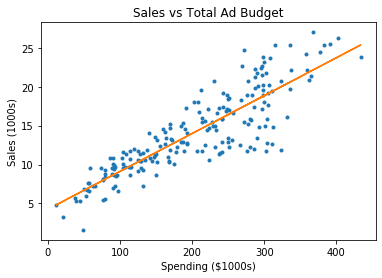

In [8]:
plt.plot(tv+radio+newspaper, sales, '.')
plt.plot(tv+radio+newspaper, LR.intercept_ + (tv+radio+newspaper) * total_coef, '-')
plt.xlabel("Spending ($1000s)")
plt.ylabel("Sales (1000s)")
plt.title("Sales vs Total Ad Budget")
plt.show()

In particular, total sales by total budget is fit well by linear regression (likely due to TV eating most of majority of the budgets)

In [9]:
print("TV coefficient: %.3f" % tv_coef)
print("Radio coefficient: %.3f" % radio_coef)
print("Newspaper coefficient: %.3f" % newspaper_coef)
print("Total coefficient: %.3f" % total_coef)

TV coefficient: 0.048
Radio coefficient: 0.202
Newspaper coefficient: 0.055
Total coefficient: 0.049


It seems like, on average, spending 1000 dollars on advertising brings about 50 new sales, with radio avertising being significantly more effective at 200 sales per thousand dollars in spending. But what happens if we do a multidimensional fit? 

In [10]:
X = data[['TV', 'Radio', 'Newspaper']]
Sales = data['Sales']

Fit_All = LR.fit(X, y)

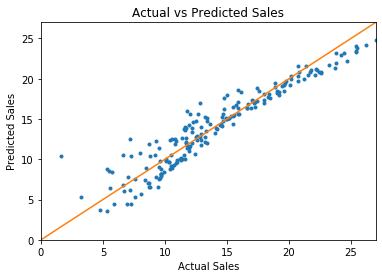

In [11]:
plt.plot(sales, Fit_All.predict(X), '.')
plt.plot((0, max(sales)), (0, max(sales)))
plt.xlim((0, max(sales)))
plt.ylim((0, max(sales)))
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title("Actual vs Predicted Sales")
plt.show()

Our model seems pretty good once again! 

In [12]:
print("TV coefficient: %.3f" % Fit_All.coef_[0])
print("Radio coefficient: %.3f" % Fit_All.coef_[1])
print("Newspaper coefficient: %.3f" % Fit_All.coef_[2])

TV coefficient: 0.046
Radio coefficient: 0.189
Newspaper coefficient: -0.001


It seems like our newspaper coefficient is now zero. How can that be? Let's investigate!

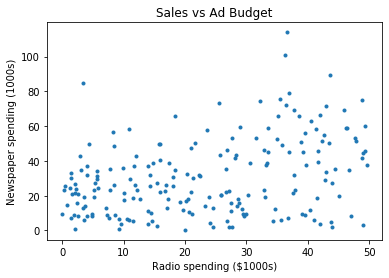

In [13]:
plt.plot( radio, newspaper,  '.')
# plt.plot(newspaper, sales, '.')
plt.xlabel("Radio spending ($1000s)")
plt.ylabel("Newspaper spending (1000s)")
plt.title("Sales vs Ad Budget")
# plt.xlim((0, 100))
# plt.ylim((0, 100))
plt.show()

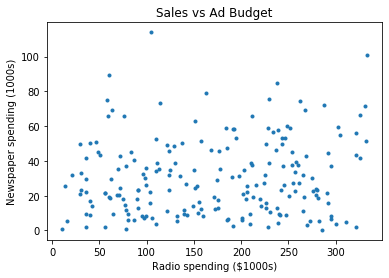

In [14]:
plt.plot( tv + radio, newspaper,  '.')
# plt.plot(newspaper, sales, '.')
plt.xlabel("Radio spending ($1000s)")
plt.ylabel("Newspaper spending (1000s)")
plt.title("Sales vs Ad Budget")
# plt.xlim((0, 100))
# plt.ylim((0, 100))
plt.show()

When fiting to all three spending parameters, the dependence of sales on newspaper advertising vanishes. This is because spending is correlated; higher spending on TV and (especially) radio advertising correlates with higher spending on newspaper advertisement. 

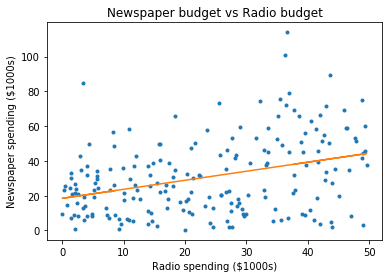

In [15]:
radio_cor_coef = LR.fit(radio, newspaper).coef_[0]
radio_cor_int = LR.intercept_

plt.plot(radio, newspaper, '.')
plt.plot(radio, radio_cor_int + (radio) * radio_cor_coef)
# plt.plot(newspaper, sales, '.')
plt.xlabel("Radio spending ($1000s)")
plt.ylabel("Newspaper spending ($1000s)")
plt.title("Newspaper budget vs Radio budget")
plt.show()

## Diagnostics

The linear regression model assumes that the errors are univariate and uncorrelated. We can check this by plotting the residuals.

First, we plot the residual for a the simple 1D regression:

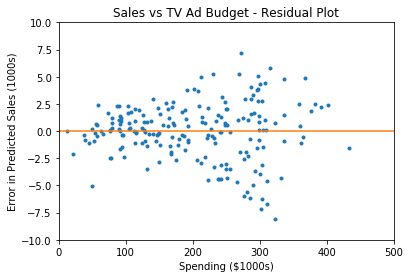

In [64]:
total_resid = np.array(sales).reshape(-1, 1) - total_intercept - (newspaper+ radio + tv) * total_coef

plt.plot(newspaper + radio + tv,total_resid, '.')
plt.plot((0, 500), (0, 0))
plt.xlabel("Spending ($1000s)")
plt.ylabel("Error in Predicted Sales (1000s)")
plt.xlim((0, 500))
plt.ylim((-10, 10))
plt.title("Sales vs TV Ad Budget - Residual Plot")
plt.show()

This is not the worst residual plot I've ever seen. Now we plot a Q-Q plot, which should be linear if the residual is normally distributed.

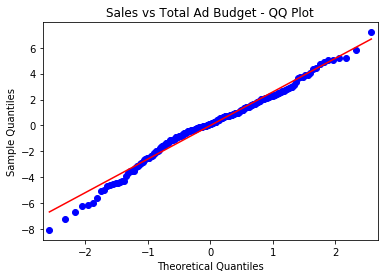

In [65]:
from statsmodels.graphics.gofplots import qqplot
qqplot(total_resid.reshape(-1), line='s')
plt.title("Sales vs Total Ad Budget - QQ Plot")
plt.show()

Now, we do the same for the three-dimensinal fit: 

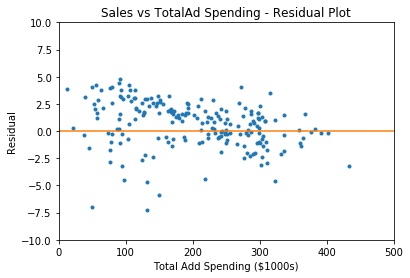

In [67]:
multi_resid = np.array(sales).reshape(-1, 1) - total_coef - (newspaper * newspaper_coef + radio * radio_coef + tv * tv_coef)


plt.plot((tv + newspaper + radio), multi_resid, '.')
#plt.plot((TV.values + Newspaper.values + Radio.values), (Multifit.resid), '.')

plt.plot((0, 500), (0, 0))
plt.xlabel("Total Add Spending ($1000s)")
plt.ylabel("Residual")
plt.xlim((0, 500))
plt.ylim((-10, 10))
plt.title("Sales vs TotalAd Spending - Residual Plot")
plt.show()

This looks similar, with slightly less error, especially at high spending

[]

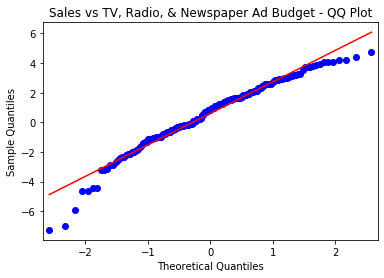

In [68]:
qqplot(multi_resid.reshape(-1), line='s')
plt.title("Sales vs TV, Radio, & Newspaper Ad Budget - QQ Plot")
plt.plot()

This looks very good, except at the extrema